# 회귀
파이썬 머신러닝 완벽 가이드 ch.05
- 회귀는 통계학에서 메인
- 유전적 특성 연구에서 주로 사용 시작
    - 부모의 키가 크더라도 자식의 키가 대를 이어 커지지 않고,
    - 부모의 키가 작더라도 자식의 키가 대를 이어 작지는 않다.
    - 부모(독립변수: x), 자식(종속변수: y)
- 단순선형 회귀 (변수, feature, 컬럼명)
    - f(x)(y)(종속변수, 반응변수) = 기울기(독립변수, 설명면수)
ex)
APT가격 = A1회귀계수*(등급)+A2회귀계수*(등급)~~

- 지도학습
    - 분류(이산값) = category(True/False)
    - 수치 예측(회귀) / 연속값 (키,몸무게,판매량)
    
- 선형회귀모델 (13~ 가지)
    - 전통적인 모델들
        - 문제 발생: 오차합(RSS) 거대 >> 오차 줄일 수 있는 최적화 규제(Regularization) 도입
    - 릿지(RIdge) + 라쏘(Lassso) = 엘라스틱넷(ElasticNet)
    - **로지스틱 회귀**(비선형 문제를 해결)

- 오류합 계산방법
    1. 절대값 add
    2. 제곱 add (RSS: Residual Sum of Squared(잔차의 제곱합))
        - $RSS(w0, w1) = \frac{1}{N}\sum_{i=1}^N(y_i-(w_0-w_1*x_2))^2$ (i는 1부터 총 학습 데이터 N까지)
    3. 경사 하강법(Gradient Descent) p.296

## 시뮬레이션
$$y = 4x+(6+error)$$

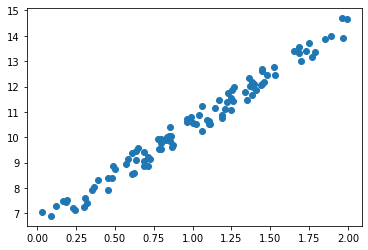

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123) # 실험 재현성

x = 2*np.random.rand(100, 1) # 100개의 랜덤값 만들기
y = 4*x+ (6+np.random.rand(100, 1)) #

plt.scatter(x,y)

In [5]:
x.shape, y .shape

((100, 1), (100, 1))

경사하강법으로 최적 기울기 찾기

In [11]:
# w1과 w0를 업데이트할 w1_update, w0_update 값 반환

def get_weight_update (w1, w0, x, y, learning_rate=0.01):
    N =len(y)
    
    # w1_update, w0_update 초기화
    w1_update = np.zeros_like(w1)
    #print("w1_update:",w1_update)
    
    # 예측 배열 계산하고, 예측값과 실젯 값의 차이 계산
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred # 실제값 - 예측값 = 오차
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진(곱셈 공식을 위해) 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0를 업데이트할 w1_update & w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(x.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [14]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

y_pred = np.dot(x, w1.T)+w0
diff = y-y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(x.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))

print(w1_update.shape, w0_update.shape)
print(w1,w0)

(100, 1)
(1, 1) (1, 1)
[[0.]] [[0.]]


In [15]:
# 입력 인자 반복문 코드

def gradiend_descent_steps(x,y,iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # iters만큼 반복 수행 get_weight_update
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,x,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0

- 예측 오차 비용 계산하는 함수 생성 및 경사 하강법 수행

In [28]:
def get_cost(y, y_pred):
    N = len(y)
    
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradiend_descent_steps(x,y,iters=10000)
print("w1:{0:.4f}, w0:{1:.4f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0]*x+w0
print("Total cost:{0:.4f}".format(get_cost(y, y_pred)))

w1:3.9462, w0:6.5590
Total cost:0.0803


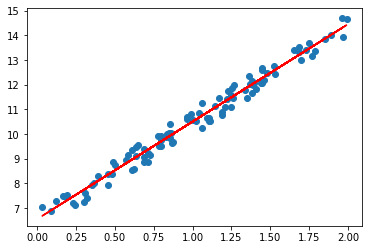

In [20]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")

## [사이킷런](https://scikit-learn.org/stable/index.html) LinearRegression 클래스

- MAE (Mean Absolute Error) 오차 차이를 절대값으로 변환해 평균한 것
- MSE (Mean Squared Error) 오차 차이를 제곱해 평균한 것
- MSLE (log MSE)
- RMSE

====================
- R^2: 분산 기반 예측성능 평가. R2 - 예측값(분산) / 실제값(분산)

====================
- 사이킷런 회귀 평가 모형 함수
- 기본 제공: MAE, MSE, R^2

In [29]:
import pandas as pd

In [30]:
bostonDF = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
bostonDF.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### EDA
- 종속변수(y)가 기준 >> y값 서치 (boston: medv)

row is 0, col is 0
row is 0, col is 1
row is 0, col is 2
row is 0, col is 3
row is 1, col is 0
row is 1, col is 1
row is 1, col is 2
row is 1, col is 3


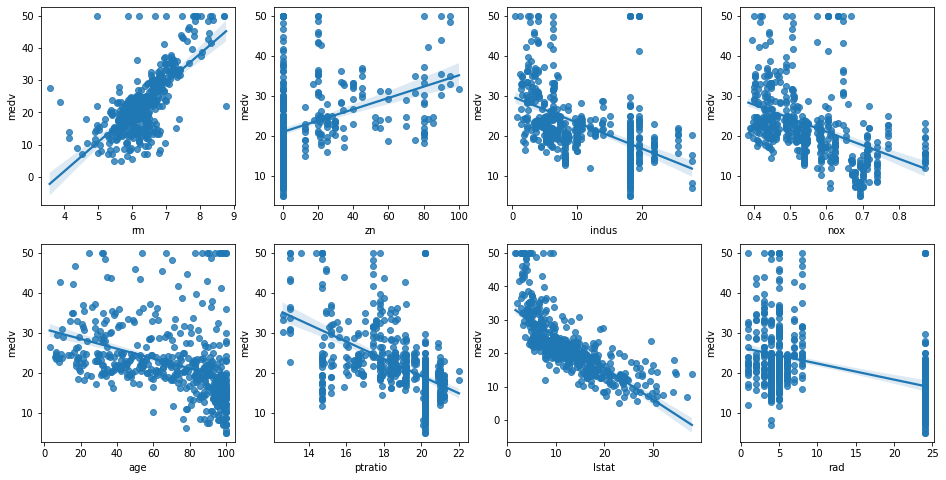

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ["rm", "zn", "indus", "nox", "age", "ptratio", "lstat", "rad"]

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    print("row is {}, col is {}".format(row, col))
    
    sns.regplot(x = feature, y = "medv", data = bostonDF, ax = ax[row][col])

- 두 연속형 변수를 활용한 산점도, 회귀식
- & 박스플롯(x: 명목형, y: medv)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target = bostonDF["medv"] # 종속변수 y
x_data = bostonDF.drop(["medv"], axis = 1, inplace = False) # 독립변수 x

y_target.shape, x_data.shape

((506,), (506, 13))

### 데이터셋 분리
- 예측, 시뮬레이션, 가상의 데이터를 가지고 예측 & 시뮬레이션
- 예측한 결과값 vs 실제값 비교
- 실무: 100중 70:30 = 학습data:평가data

In [39]:
# 임의 샘플링

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3, random_state = 156)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### ML 모형 만들기

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)


y_preds = lr.predict(x_test)
y_preds

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)

print("MSE: {0:.3f}".format(mse))

MSE: 17.297


In [48]:
import numpy as np

print("절편 값:", lr.intercept_) # 절편 값
print("회귀 계수값:", np.round(lr.coef_,1))

coeff_df = pd.Series(data=np.round(lr.coef_, 1), index = x_data.columns)
coeff_df.sort_values(ascending=False)

절편 값: 40.9955951721646
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


rm          3.4
chas        3.0
rad         0.4
zn          0.1
indus       0.0
age         0.0
tax        -0.0
b           0.0
crim       -0.1
lstat      -0.6
ptratio    -0.9
dis        -1.7
nox       -19.8
dtype: float64